# Data Analysis and Visualization Assignment-1

## Team Memebers (NAME + ROLL)
-   Rahul (12141300)
-   Supabho Saha (12141640)

## Part A

In [1]:
#importing required libraries
import time
import os
import re
import pandas as pd
from bs4 import BeautifulSoup
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from tqdm import tqdm
import numpy as np

In [2]:
pd.options.display.html.use_mathjax = False

### Data Scraping
Scrape the job-postings for the following roles in India:
- Data Engineer
- Data Analyst
- Data Scientist
- Machine Learning Engineer

**Instructions**
- Scrape 300 Job postings per role
- For each job posting, extract the following information:
     - job_title
     - job_role (one of the above 4)
     - company
     - job_location
     - job_summary
     - post_date (posted how many days ago)
     - today (date)
     - job_salary(if not present, fill it with NaN)
     - Job_url
- Create a dataframe from this information

In [3]:
Job_title=[]
Job_role  = []
Company = []
Job_location = []
Job_summary = []
Post_date = []
Today = []
Job_salary = []
Job_url = []

driver = webdriver.Chrome(executable_path="E:\Softwares\Google Chrome\chromedriver_win32\chromedriver.exe")
roles = ['Data Engineer', 'Data Analyst', 'Data Scientist', 'Machine Learning Engineer']
# Scrape 300 Job postings per role
for role in roles:
    print(f"Companies offering jobs for {role} role:-")
    for i in range(30):
        link = f"https://in.indeed.com/jobs?q={role.replace(' ', '+')}&l=India&start={10*i}"
        driver.get(link)
        page_source = driver.page_source
        # Parse 1-page
        soup = BeautifulSoup(page_source, 'lxml')
        vacancies = soup.find_all('div', attrs = {'class':'job_seen_beacon'})
        for job in vacancies:
            #Job Title
            title = job.find('span')
            job_title = title.text
            Job_title.append(job_title)

            #Job Role
            Job_role.append(role)

            #Company
            company = job.find('span', attrs = {'class': 'companyName'})
            Company.append(company.text)

            #Job Location
            location = job.find('div', attrs = {'class':'companyLocation'})
            Job_location.append(location.text)

            #Job Summary
            summary = job.find('div', attrs = {'class':'job-snippet'})
            text = summary.text[1:-1]
            Job_summary.append(text)

            #Post Date
            date = job.find('span', attrs = {'class':'date'})
            post = date.text
            Post_date.append(post)

            #Today
            Today.append(np.datetime64('today', 'D'))

            #Job Salary
            salary = job.find('div', attrs = {'class':'metadata salary-snippet-container'})
            if salary == None:
                Job_salary.append('NaN')
            else:
                Job_salary.append(salary.text[:-7])

            #Job URL
            Job_url.append(link)
        time.sleep(2)

C:\Users\supra\AppData\Local\Temp\ipykernel_10412\398198076.py:11: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path="E:\Softwares\Google Chrome\chromedriver_win32\chromedriver.exe")


Companies offering jobs for Data Engineer role:-
Companies offering jobs for Data Analyst role:-
Companies offering jobs for Data Scientist role:-
Companies offering jobs for Machine Learning Engineer role:-


In [5]:
data = {'Job_title':Job_title,'Job_role':Job_role, 
        'Company':Company,'Job_location':Job_location, 
        'Job_summary':Job_summary,'Post_date':Post_date, 
        'Today':Today,'Job_salary':Job_salary,
        'Job_url':Job_url}

In [175]:
db = pd.DataFrame.from_dict(data)
db.to_csv('job2.csv', index = False)

#### Creation of dataset from the data scrapped

In [176]:
db=pd.read_csv('job2.csv')

In [177]:
db.head()

,Job_title,Job_role,Company,Job_location,Job_summary,Post_date,Today,Job_salary,Job_url
0,AI/ML Engineer,Data Engineer,Pitchvantage llc,Remote,"Collaborate with data scientists, software eng...",PostedJust posted,2023-03-19,"₹20,00,000 - ₹30,00,000",https://in.indeed.com/jobs?q=Data+Engineer&l=I...
1,iOS Developer,Data Engineer,Nureca Dr. Trust,"Chandigarh, Chandigarh","Good knowledge on concurrency, memory handling...",PostedPosted 3 days ago,2023-03-19,"₹12,00,000 - ₹15,00,000",https://in.indeed.com/jobs?q=Data+Engineer&l=I...
2,Sr Software Engineer - Data,Data Engineer,Uber,"Bengaluru, Karnataka",Unless formally approved to work fully remotel...,PostedPosted 30+ days ago,2023-03-19,NaN,https://in.indeed.com/jobs?q=Data+Engineer&l=I...
3,Sr. DevOps Engineer - Observability,Data Engineer,SailPoint,Maharashtra,Serve as a mentor to junior engineers.\nStrong...,PostedPosted 30+ days ago,2023-03-19,NaN,https://in.indeed.com/jobs?q=Data+Engineer&l=I...
4,Integration Software Engineer - AEM,Data Engineer,PathFactory,Remote,Develop data share between the external data l...,PostedPosted 11 days ago,2023-03-19,NaN,https://in.indeed.com/jobs?q=Data+Engineer&l=I...


#### Data Cleaning

In [178]:
df=db.dropna()
df.head()

,Job_title,Job_role,Company,Job_location,Job_summary,Post_date,Today,Job_salary,Job_url
0,AI/ML Engineer,Data Engineer,Pitchvantage llc,Remote,"Collaborate with data scientists, software eng...",PostedJust posted,2023-03-19,"₹20,00,000 - ₹30,00,000",https://in.indeed.com/jobs?q=Data+Engineer&l=I...
1,iOS Developer,Data Engineer,Nureca Dr. Trust,"Chandigarh, Chandigarh","Good knowledge on concurrency, memory handling...",PostedPosted 3 days ago,2023-03-19,"₹12,00,000 - ₹15,00,000",https://in.indeed.com/jobs?q=Data+Engineer&l=I...
11,Data Engineer,Data Engineer,Global Employees,Remote,Passion for engineering and computer science a...,EmployerActive 1 day ago,2023-03-19,"₹10,00,000 - ₹30,00,000",https://in.indeed.com/jobs?q=Data+Engineer&l=I...
12,DATA ANALYST,Data Engineer,Larsen & Toubro Limited,"Chennai, Tamil Nadu","Developing and maintaining databases , data sy...",PostedPosted 11 days ago,2023-03-19,"₹8,00,000 - ₹12,00,000",https://in.indeed.com/jobs?q=Data+Engineer&l=I...
14,Data Engineer,Data Engineer,Nineleaps,"Bengaluru, Karnataka",Experience building data processing frameworks...,PostedPosted 3 days ago,2023-03-19,"₹7,96,296 - ₹21,50,927",https://in.indeed.com/jobs?q=Data+Engineer&l=I...


In [179]:
s=list(df['Job_salary'])
import re
pattern = r'[^\d.-]'
data_cleaned = [re.sub(pattern, '', i) for i in s]
df['Job_salary']=data_cleaned

C:\Users\supra\AppData\Local\Temp\ipykernel_10412\958400768.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [180]:
num=[]
k=[]
for i in range(0,len(data_cleaned)):
  s=data_cleaned[i].split('-')
  if len(s)==2:
    for j in range(0,len(s)):
      num.append(int(''.join(map(str, s[j]))))
    sum=(num[0]+num[1])/2
    k.append(sum)
    num=[]
  else:
    k.append(int(data_cleaned[i]))
df['Job_salary']=k

C:\Users\supra\AppData\Local\Temp\ipykernel_10412\3224470273.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [183]:
df.head()

,Job_title,Job_role,Company,Job_location,Job_summary,Post_date,Today,Job_salary,Job_url
0,AI/ML Engineer,Data Engineer,Pitchvantage llc,Remote,"Collaborate with data scientists, software eng...",PostedJust posted,2023-03-19,2500000.0,https://in.indeed.com/jobs?q=Data+Engineer&l=I...
1,iOS Developer,Data Engineer,Nureca Dr. Trust,"Chandigarh, Chandigarh","Good knowledge on concurrency, memory handling...",PostedPosted 3 days ago,2023-03-19,1350000.0,https://in.indeed.com/jobs?q=Data+Engineer&l=I...
11,Data Engineer,Data Engineer,Global Employees,Remote,Passion for engineering and computer science a...,EmployerActive 1 day ago,2023-03-19,2000000.0,https://in.indeed.com/jobs?q=Data+Engineer&l=I...
12,DATA ANALYST,Data Engineer,Larsen & Toubro Limited,"Chennai, Tamil Nadu","Developing and maintaining databases , data sy...",PostedPosted 11 days ago,2023-03-19,1000000.0,https://in.indeed.com/jobs?q=Data+Engineer&l=I...
14,Data Engineer,Data Engineer,Nineleaps,"Bengaluru, Karnataka",Experience building data processing frameworks...,PostedPosted 3 days ago,2023-03-19,1473611.5,https://in.indeed.com/jobs?q=Data+Engineer&l=I...


In [184]:
# Clean the 'job_location' column to include only city name in India, if no city is found, 
# make it by default 'India'. If its remote make the value as 
df[['city','Job_location','remo']]=df.Job_location.str.split(",", expand = True)
df=df.drop(['remo'],axis=1)

C:\Users\supra\AppData\Local\Temp\ipykernel_10412\3600196546.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\supra\AppData\Local\Temp\ipykernel_10412\3600196546.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [185]:
# Create a new column called 'is_remote', which will be true if its a remote job.
df['is_remote'] = df['city'].apply(lambda x: True if x.lower() == 'Remote' else False)
df.head()

,Job_title,Job_role,Company,Job_location,Job_summary,Post_date,Today,Job_salary,Job_url,city,is_remote
0,AI/ML Engineer,Data Engineer,Pitchvantage llc,None,"Collaborate with data scientists, software eng...",PostedJust posted,2023-03-19,2500000.0,https://in.indeed.com/jobs?q=Data+Engineer&l=I...,Remote,False
1,iOS Developer,Data Engineer,Nureca Dr. Trust,Chandigarh,"Good knowledge on concurrency, memory handling...",PostedPosted 3 days ago,2023-03-19,1350000.0,https://in.indeed.com/jobs?q=Data+Engineer&l=I...,Chandigarh,False
11,Data Engineer,Data Engineer,Global Employees,None,Passion for engineering and computer science a...,EmployerActive 1 day ago,2023-03-19,2000000.0,https://in.indeed.com/jobs?q=Data+Engineer&l=I...,Remote,False
12,DATA ANALYST,Data Engineer,Larsen & Toubro Limited,Tamil Nadu,"Developing and maintaining databases , data sy...",PostedPosted 11 days ago,2023-03-19,1000000.0,https://in.indeed.com/jobs?q=Data+Engineer&l=I...,Chennai,False
14,Data Engineer,Data Engineer,Nineleaps,Karnataka,Experience building data processing frameworks...,PostedPosted 3 days ago,2023-03-19,1473611.5,https://in.indeed.com/jobs?q=Data+Engineer&l=I...,Bengaluru,False


## Part B

In [159]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="whitegrid", color_codes=True)
import plotly.io as pio
import plotly.express as px
pd.set_option('display.max_columns', None)

import warnings

#### How are the jobs distributed geographihcally?

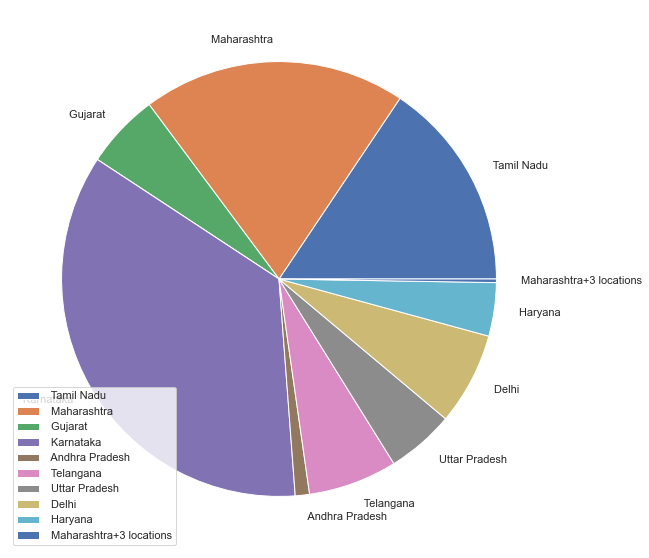

In [160]:
k=[]
s=[]
location=list(df['Job_location'].unique())
# Show which companies have vacancies in different role.
for i in range (0,len(location)-21):
    k.append(df[df['Job_location']==location[i]].shape[0])
    s.append(location[i])
y =k
mylabels = s
plt.figure(figsize=(20,10))
plt.pie(y, labels = mylabels)
plt.legend()

#### Show which companies have vacancies in different role.

<BarContainer object of 373 artists>

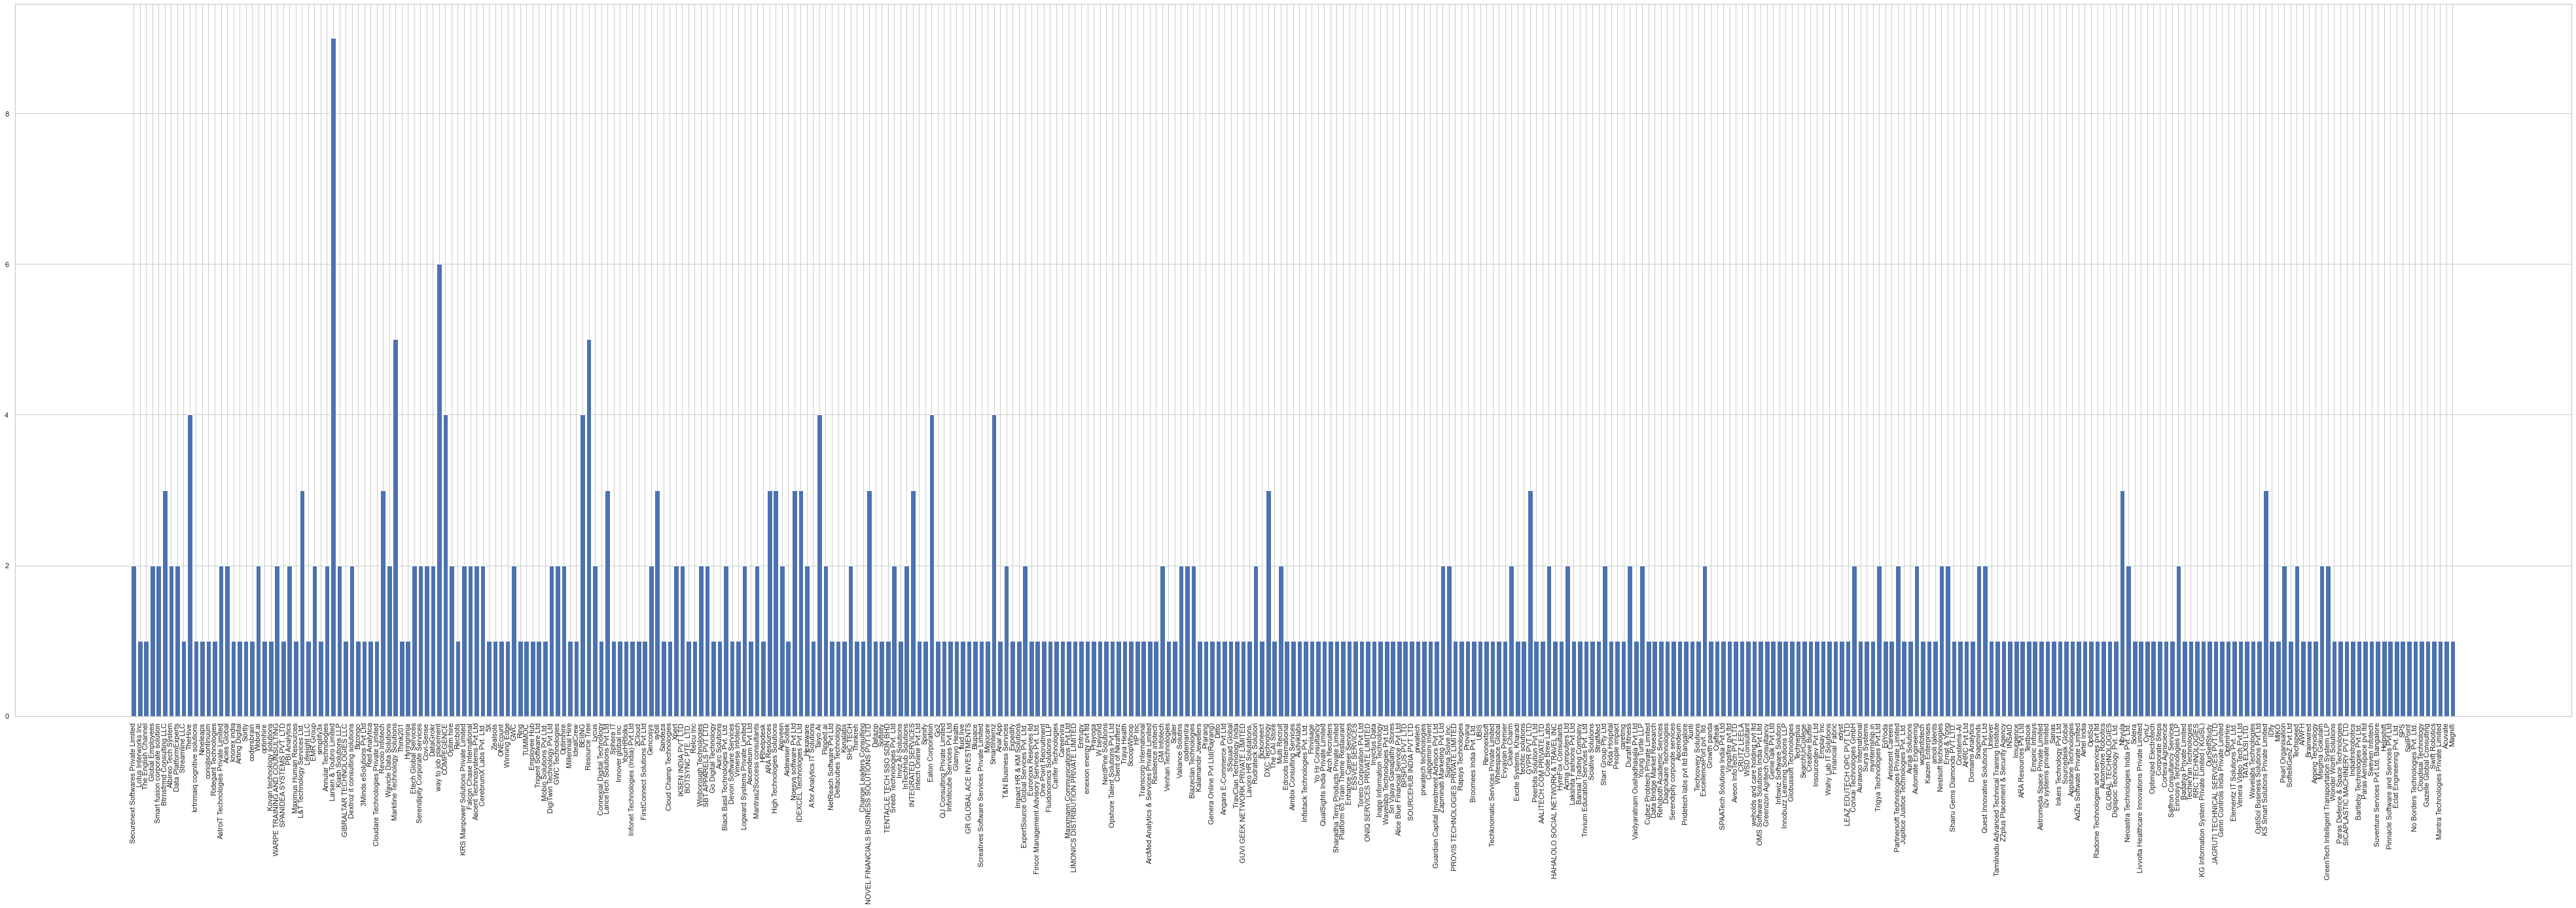

In [161]:
no=[]
company=list(df['Company'].unique())
# Show which companies have vacancies in different role.
for i in df['Company'].unique():
  no.append(df[df['Company']==i].shape[0])
plt.figure(figsize=(70,20))
plt.xticks(rotation='vertical')
plt.bar(range(len(company)),no, tick_label=company)

#### Show the distribution of number of characters in description.

In [162]:
des=list(df['Job_summary'])
desc=str(des)
all_freq = {}
 
for i in desc:
    if i in all_freq:
        all_freq[i] += 1
    else:
        all_freq[i] = 1

#Printing result
char = dict(sorted(all_freq.items(), key=lambda x: x[0]))

<BarContainer object of 100 artists>

C:\Users\supra\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning:

Glyph 10070 (\N{BLACK DIAMOND MINUS WHITE X}) missing from current font.



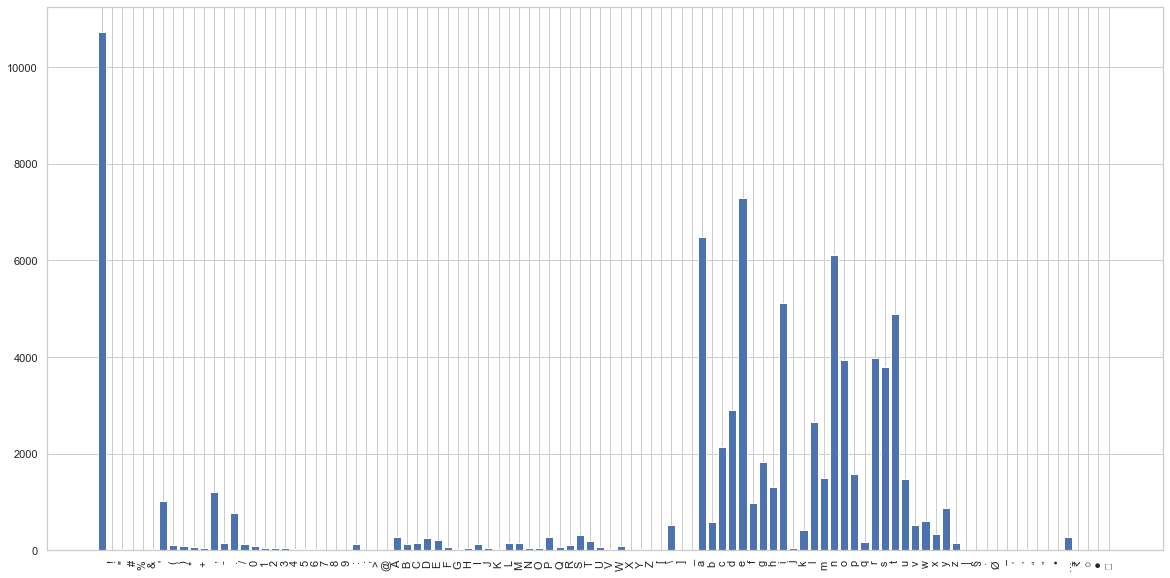

In [163]:
names = list(char.keys())
values = list(char.values())
plt.figure(figsize=(20,10))
plt.xticks(rotation='vertical')
plt.bar(range(len(char)), values, tick_label=names)

#### Show the distribution of salaries in remote jobs based on roles.

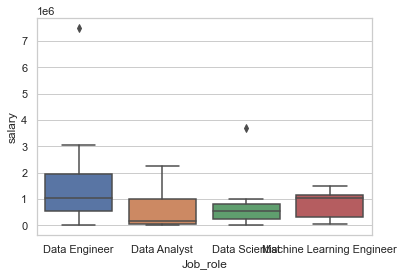

In [164]:
db=df[df['city']=='Remote']
ax = sns.boxplot(x="Job_role", y="Job_salary", data=db)
ax.set_ylabel("salary")
plt.show()

#### Show the distribution of salaries in ‘Bangalore’.

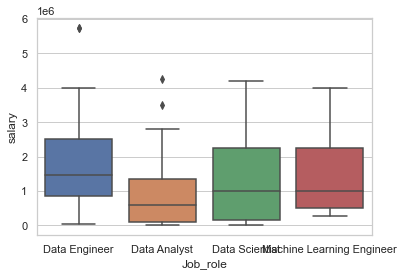

In [165]:
db=df[df['city']=='Bengaluru']
ax = sns.boxplot(x="Job_role", y="Job_salary", data=db)
ax.set_ylabel("salary")
plt.show()

## Part C

In [166]:
# Checking the top 5 cities for data analysts
px.histogram(df['city'])
# Top 5 cities are 1.Bengaluru ,2.Remote ,3.Mumbai ,4.Pune ,5.Delhi

In [167]:
db = df[df['city'].isin(['Bengaluru', 'Remote', 'Mumbai', 'Pune', 'Delhi','Hyderabad'])]

In [168]:
db

,Job_title,Job_role,Company,Job_location,Job_summary,Post_date,Today,Job_salary,Job_url,city
3,Sr. Python Developer,Data Engineer,Lotus Interworks Inc,Maharashtra,Implementing security and data protection solu...,PostedPosted 30+ days ago,2023-03-17,65000.0,https://in.indeed.com/jobs?q=Data+Engineer&l=I...,Mumbai
10,Data Engineer,Data Engineer,Global Employees,None,Passion for engineering and computer science a...,EmployerActive 3 days ago,2023-03-17,2000000.0,https://in.indeed.com/jobs?q=Data+Engineer&l=I...,Remote
11,SQL Data Engineer,Data Engineer,Smart fusion corporate solution,None,mmediate Hiring!!! Salary : 400000 lak to 1200...,EmployerActive 1 day ago,2023-03-17,900000.0,https://in.indeed.com/jobs?q=Data+Engineer&l=I...,Remote
13,Big Data Engineer,Data Engineer,Albireo Tech System,None,"Skills- ETL, aws, sql, kafka, spark, dynamodb....",PostedPosted 24 days ago,2023-03-17,650.0,https://in.indeed.com/jobs?q=Data+Engineer&l=I...,Remote
14,Manual Test Engineer,Data Engineer,Data PlatformExperts,None,Understand the assigned client requirement spe...,EmployerActive 8 days ago,2023-03-17,500000.0,https://in.indeed.com/jobs?q=Data+Engineer&l=I...,Remote
...,...,...,...,...,...,...,...,...,...,...
1747,AWS Data Engineer with ML ops,Machine Learning Engineer,Gazelle Global Consulting,None,Incident and problem management specific to AW...,PostedPosted 30+ days ago,2023-03-17,65547.0,https://in.indeed.com/jobs?q=Machine+Learning+...,Remote
1749,Robotics Software Engineer,Machine Learning Engineer,Swift Robotics,Maharashtra,"Knowledge and interest in computer vision, mac...",EmployerActive 2 days ago,2023-03-17,550000.0,https://in.indeed.com/jobs?q=Machine+Learning+...,Mumbai
1756,Data Scientist,Machine Learning Engineer,Marktine Technology Solutions,Delhi,Build predictive models and machine-learning a...,PostedPosted 30+ days ago,2023-03-17,2000000.0,https://in.indeed.com/jobs?q=Machine+Learning+...,Delhi
1770,Sr Software Engineer - AI & ML,Machine Learning Engineer,Mantra Technologies Private Limited,Telangana,Analyze and explain AI and machine learning (M...,EmployerActive 1 day ago,2023-03-17,2250000.0,https://in.indeed.com/jobs?q=Machine+Learning+...,Hyderabad


In [169]:
db.groupby('city')

In [170]:
db['Job_salary'] = db['Job_salary'].astype(int)

C:\Users\supra\AppData\Local\Temp\ipykernel_10412\129926666.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [171]:
db.groupby(['city','Job_role']).mean()

Job_salary
city      Job_role                               
Bengaluru Data Analyst               1.112908e+06
          Data Engineer              1.721353e+06
          Data Scientist             1.503347e+06
          Machine Learning Engineer  1.456725e+06
Delhi     Data Analyst               4.494167e+05
          Data Engineer              5.350000e+05
          Data Scientist             2.350000e+06
          Machine Learning Engineer  1.008400e+06
Hyderabad Data Analyst               1.687458e+06
          Data Engineer              9.859947e+05
          Data Scientist             1.805197e+06
          Machine Learning Engineer  1.661500e+06
Mumbai    Data Analyst               8.461111e+05
          Data Engineer              8.294830e+05
          Data Scientist             1.851717e+06
          Machine Learning Engineer  1.450000e+06
Pune      Data Analyst               1.135071e+06
          Data Engineer              1.884345e+06
          Data Scientist             9.833152e+05
          Machine Learning Engineer  3.953750e+05
Remote    Data Analyst               6.618231e+05
          Data Engineer              1.397745e+06
          Data Scientist             9.192857e+05
          Machine Learning Engineer  7.985406e+05

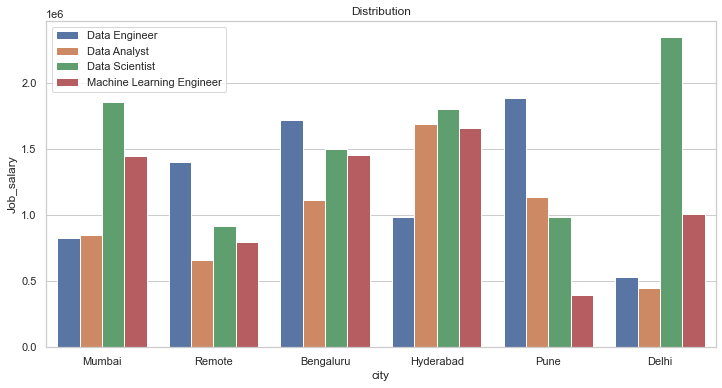

In [172]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(data=db, x="city", y="Job_salary",  hue="Job_role", ax=ax, ci=None)

ax.set_title("Distribution")
ax.legend()
plt.show()

### Is the salary of Data Scientist in Bangalore higher than Hyderabad?
##### The salary of Data Scientist in Hyderabad is higher as compared to Bangalore.

### Which location should I favour for ML Engineer Role?
##### By considering salary as the only factor one should prefer to opt for a role of ML Engineer in Hyderabad. But there are various other factors which may change the opinion.